<a href="https://colab.research.google.com/github/Laureoby/audible_visualization/blob/main/audible_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/content/drive/MyDrive/audible_uncleaned.csv')
data

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [5]:
data.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
#remove Writtenby: in author and narrated by in Narrator
data['author'] = data['author'].str.replace('Writtenby:','')
data['author']

0        GeronimoStilton
1            RickRiordan
2             JeffKinney
3            RickRiordan
4            RickRiordan
              ...       
87484       ChrisStewart
87485      StephenO'Shea
87486          MarkTwain
87487     LaurenceSterne
87488      MarkKurlansky
Name: author, Length: 87489, dtype: object

In [12]:
def split_names(data, column_name):
    pattern = re.compile(r'(?<=[a-z])(?=[A-Z])')
    data[column_name] = data[column_name].apply(lambda x: ' '.join(pattern.split(x, 1)))
    return data
data = split_names(data, 'author')
data

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Stephen O'Shea,RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Mark Twain,FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Laurence Sterne,AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [11]:
#We remove Narreted by in the culomn narrator
data['narrator'] = data['narrator'].str.replace('Narratedby:','')
data['narrator']

0            BillLobely
1         RobbieDaymond
2            DanRussell
3        SoneelaNankani
4        JesseBernstein
              ...      
87484      ChrisStewart
87485        RobertFass
87486         FloGibson
87487       AntonLesser
87488       FleetCooper
Name: narrator, Length: 87489, dtype: object

In [13]:
data = split_names(data, 'narrator')
data

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,Dan Russell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Stephen O'Shea,Robert Fass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Mark Twain,Flo Gibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [14]:
#Now we work on time column
data['time'] = data['time'].astype(str)
hours = data['time'].str.extract(r'(\d+)\s*hrs').astype(float)
minutes = data['time'].str.extract(r'(\d+)\s*mins').astype(float)
hours_in_min = hours * 60
total_min = hours_in_min.fillna(0) + minutes.fillna(0)
data['time'] = total_min
data

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140.0,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,Robbie Daymond,788.0,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,Dan Russell,123.0,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676.0,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600.0,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,454.0,09-03-17,English,Not rated yet,596.00
87485,The Alps,Stephen O'Shea,Robert Fass,607.0,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Mark Twain,Flo Gibson,1144.0,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,248.0,23-02-11,English,Not rated yet,680.00


In [15]:
#We work on rating column. We divide stars column in two one for stars and the other one for ratings
data['ratings'] = data['stars']
data


,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140.0,04-08-08,English,5 out of 5 stars34 ratings,468.00,5 out of 5 stars34 ratings
1,The Burning Maze,Rick Riordan,Robbie Daymond,788.0,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,4.5 out of 5 stars41 ratings
2,The Deep End,Jeff Kinney,Dan Russell,123.0,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,4.5 out of 5 stars38 ratings
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676.0,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,4.5 out of 5 stars12 ratings
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600.0,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,4.5 out of 5 stars181 ratings
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,454.0,09-03-17,English,Not rated yet,596.00,Not rated yet
87485,The Alps,Stephen O'Shea,Robert Fass,607.0,21-02-17,English,Not rated yet,820.00,Not rated yet
87486,The Innocents Abroad,Mark Twain,Flo Gibson,1144.0,30-12-16,English,Not rated yet,938.00,Not rated yet
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,248.0,23-02-11,English,Not rated yet,680.00,Not rated yet


In [16]:
#we keep just stars informations in stars column
data['stars'] = data['stars'].str.extract(r'(\d+\.\d+|\d+)')
data['stars']

0          5
1        4.5
2        4.5
3        4.5
4        4.5
        ... 
87484    NaN
87485    NaN
87486    NaN
87487    NaN
87488    NaN
Name: stars, Length: 87489, dtype: object

In [17]:
#for Nan value we will change them by zero
data['stars'].fillna(value=0.0, inplace=True)
data['stars']

0          5
1        4.5
2        4.5
3        4.5
4        4.5
        ... 
87484    0.0
87485    0.0
87486    0.0
87487    0.0
87488    0.0
Name: stars, Length: 87489, dtype: object

In [18]:
#Now we select ratings in ratings's column. We keep just stars informations in stars column
data['ratings'] = data['ratings'].str.extract(r'(\d+) ratings')
data['ratings']

0         34
1         41
2         38
3         12
4        181
        ... 
87484    NaN
87485    NaN
87486    NaN
87487    NaN
87488    NaN
Name: ratings, Length: 87489, dtype: object

In [19]:
#We will just replace Nan values by O
data['ratings'].fillna(value=0.0, inplace=True)
data['ratings']

0         34
1         41
2         38
3         12
4        181
        ... 
87484    0.0
87485    0.0
87486    0.0
87487    0.0
87488    0.0
Name: ratings, Length: 87489, dtype: object

In [20]:
data

,name,author,narrator,time,releasedate,language,stars,price,ratings
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140.0,04-08-08,English,5,468.00,34
1,The Burning Maze,Rick Riordan,Robbie Daymond,788.0,01-05-18,English,4.5,820.00,41
2,The Deep End,Jeff Kinney,Dan Russell,123.0,06-11-20,English,4.5,410.00,38
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676.0,05-10-21,English,4.5,615.00,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600.0,13-01-10,English,4.5,820.00,181
...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,Chris Stewart,454.0,09-03-17,English,0.0,596.00,0.0
87485,The Alps,Stephen O'Shea,Robert Fass,607.0,21-02-17,English,0.0,820.00,0.0
87486,The Innocents Abroad,Mark Twain,Flo Gibson,1144.0,30-12-16,English,0.0,938.00,0.0
87487,A Sentimental Journey,Laurence Sterne,Anton Lesser,248.0,23-02-11,English,0.0,680.00,0.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37428 (\N{CJK UNIFIED IDEOGRAPH-9234}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21513 (\N{CJK UNIFIED IDEOGRAPH-5409}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

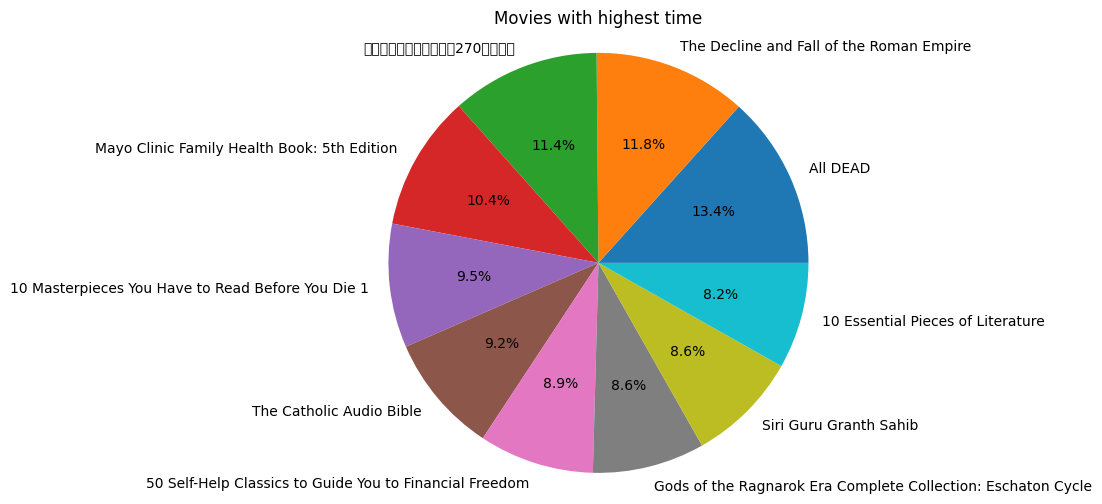

In [22]:
#Now we work on data visualization. We want to know which movies take at lot of time
movies_time = data.groupby('name')['time'].mean().sort_values(ascending=False)
#We select five countries with highest temperatures
top_movies = movies_time.head(10).index
#We create diagram
plt.figure(figsize=(10, 6))
plt.pie(movies_time[top_movies], labels=top_movies, autopct='%1.1f%%')
plt.title('Movies with highest time')
plt.axis('equal') #we want to obtain perfect circle
plt.show()

In [23]:
import seaborn as sns

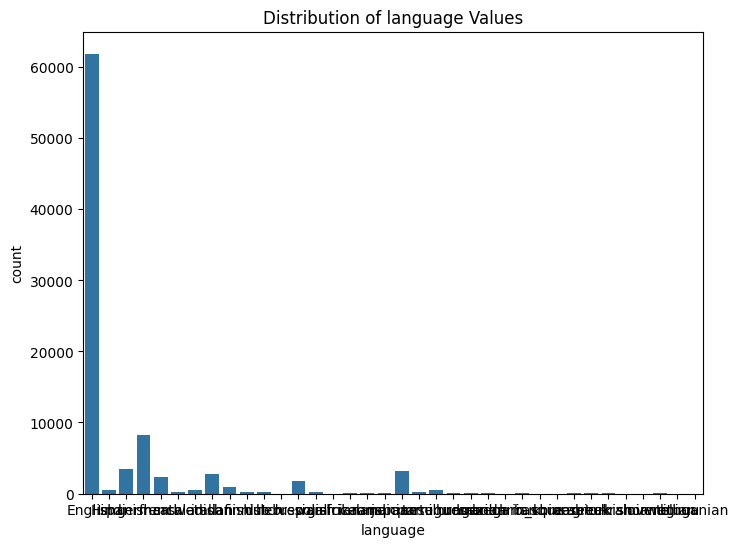

In [24]:
#we print histogram of language column
plt.figure(figsize=(8,6))
sns.countplot(x=data['language'])
plt.title('Distribution of language Values')
plt.show()

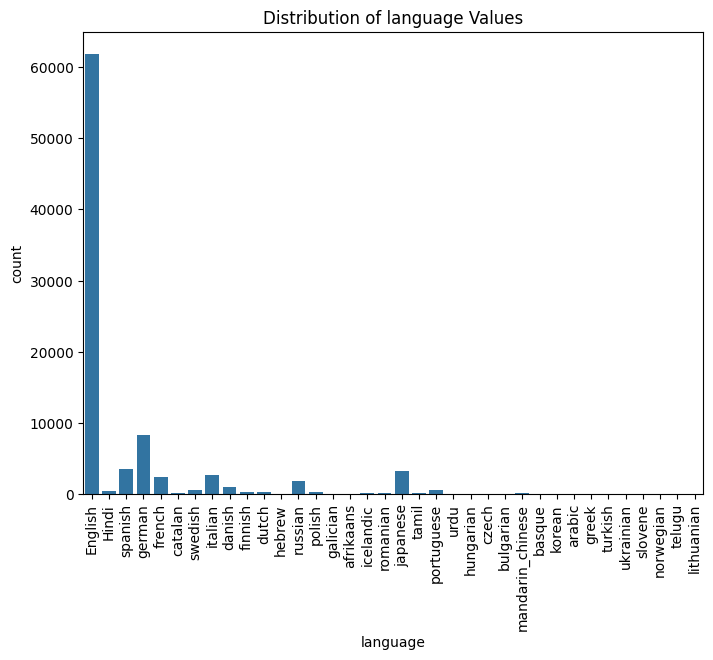

In [27]:
#we print histogram of language column
plt.figure(figsize=(8,6))
sns.countplot(x=data['language'])
plt.title('Distribution of language Values')
plt.xticks(rotation=90)
plt.show()

In [29]:
#We convert price column into numeric values
data['price'] = pd.to_numeric(data['price'], errors='coerce')

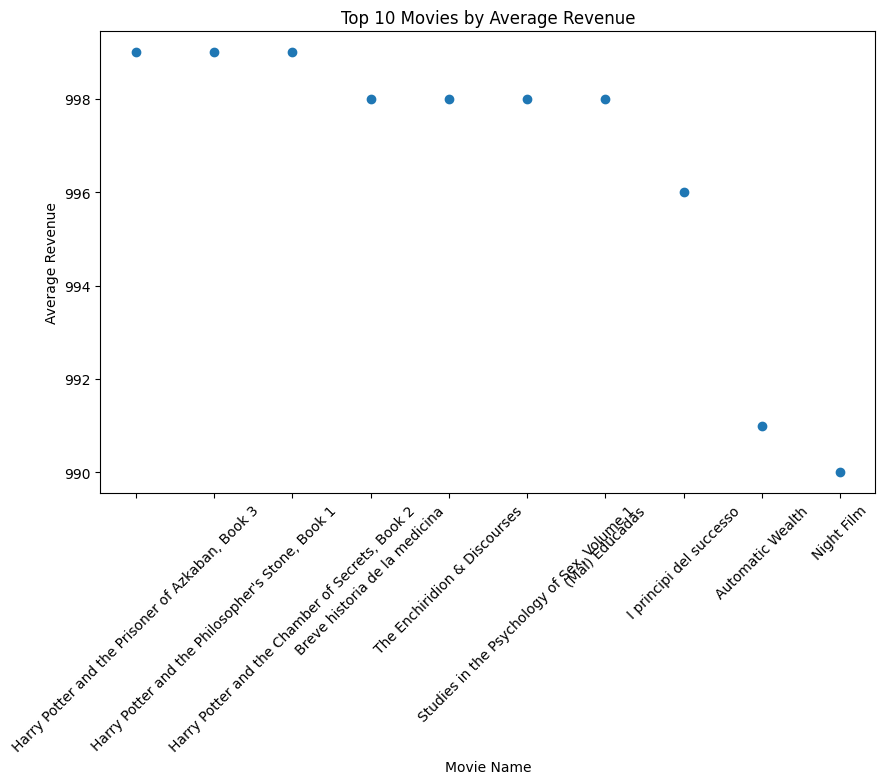

In [30]:
movies_price = data.groupby('name')['price'].mean().sort_values(ascending=False)
top_movies = movies_price.head(10)

plt.figure(figsize=(10, 6))
plt.scatter(top_movies.index, top_movies.values)
plt.title('Top 10 Movies by Average Revenue')
plt.xlabel('Movie Name')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

In [32]:
!git clone https://github.com/Laureoby/audible_visualization.git

fatal: destination path 'audible_visualization' already exists and is not an empty directory.
